# Лабораторная работа по заданию №  3. Алгоритмы безусловной нелинейной оптимизации. Методы первого и второго порядка

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numdifftools as nd
from scipy.optimize import minimize, leastsq, brute, fmin

### Объявление базовых функций, создание исходного массива

In [6]:
a=np.random.random()
b=np.random.random()
x_array=[]
y_array=[]

def lin_approx(x, a, b):
    return a*x+b
def rat_approx(x, a, b):
    return a/(1+b*x)
def main_func(x):
    sigma=np.random.normal()
    y=a*x+b+sigma
    return y

def sq_function_lin(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(lin_approx(x_array[i], a, b)-y_array[i])**2
    return summ

def sq_function_rat(params):
    a, b=params
    summ=0
    for i in range (100):
        summ=summ+(rat_approx(x_array[i], a, b)-y_array[i])**2
    return summ

for i in range (100):    
    x=i/100
    y=main_func(x)
    
    x_array.append(x)
    y_array.append(y)

#### Реализованные вручную функции

In [4]:
#Метод градиентов
def gradient_descent(func, params, e=0.001, step = 0.001):  
    grad = nd.Gradient(func)(params) 
    x1 = params - step * grad 
    iteration = 1 
    grad_calculations = 1
    while True:
        if (abs(x1[0] - params[0]) > e) or (abs(x1[1] - params[1]) > e):
            params = x1 
            grad = nd.Gradient(func)(params)
            x1 = params - step * grad 
            grad_calculations += 1 
            iteration += 1    
        else: 
            break
    a = x1[0]
    b = x1[1]
    return([a, b, iteration, grad_calculations])

def newton_optimization(func, params, e = 0.001):
    grad = nd.Gradient(func)(params) 
    hess = nd.Hessian(func)(params) 
    hess_inverted = np.linalg.inv(hess) 
    x1 = params - np.dot(hess_inverted, grad)
    iteration = 1

    while True:
        if (abs(x1[0] - params[0]) > e) or (abs(x1[1] - params[1]) > e): 
            params = x1 
            grad = nd.Gradient(func)(params) 
            hess = nd.Hessian(func)(params)
            hess_inverted = np.linalg.inv(hess) 
            x1 = params - np.dot(hess_inverted, grad) 
            iteration += 1
        else:
            break
    a = x1[0]
    b = x1[1]
    return([a, b, iteration])

### Аппроксимация рациональной функцией 


Исходные параметры:
a=0.472776278012769, b=0.30123393012846855


<ipython-input-6-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)



Метод градиентного спуска:
a=0.45101706987648743, b=-0.14724430335652774
Iteration: 137
Calculations: 137

Optimization terminated successfully.
         Current function value: 92.974322
         Iterations: 13
         Function evaluations: 90
         Gradient evaluations: 30

Метод сопряженных градиентов:
a=0.4930139140350374, b=0.012033708140632354


<ipython-input-6-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)
<ipython-input-6-d99f9168b91a>:9: RuntimeWarning: divide by zero encountered in double_scalars
  return a/(1+b*x)
/home/julia/anaconda3/envs/geoenv3/lib/python3.8/site-packages/numdifftools/core.py:896: RuntimeWarning: invalid value encountered in double_scalars
  hess[i, j] = (f(x + ee[i, :] + ee[j, :])



Метод Ньютона:
a=0.49301404053177444, b=0.012034207606312481
Iteration: 7

Метод Левенберга-Марквардта:
a=0.493061558844654, b=0.012231174870629418
Calculations: 19



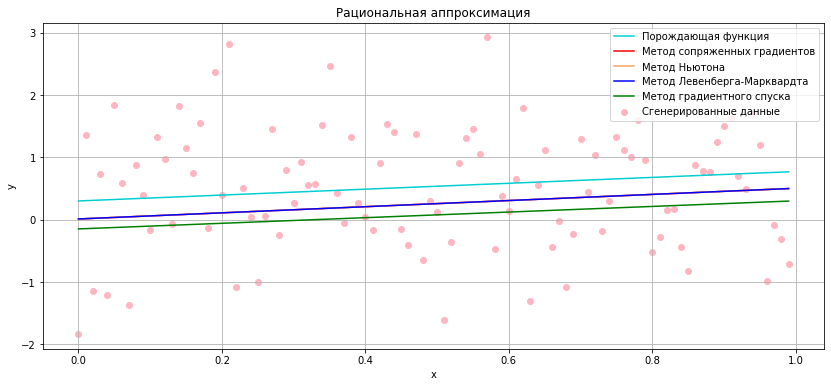

In [7]:
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))
params=[0.5, -0.5]

#Рациональная аппроксимация с минимизацией методом градиентного спуска 
res = gradient_descent(sq_function_rat, params)
GD_rat_approx_array=[res[0]*x+res[1] for x in x_array]
print('\nМетод градиентного спуска:\na='+str(res[0])+', b='+str(res[1]))
print('Iteration: '+str(res[2]))
print('Calculations: '+str(res[3])+'\n')

#Рациональная аппроксимация с минимизацией методом сопряженных градиентов 
res = minimize(sq_function_rat, params,  method='CG', options={'disp': True})
CG_rat=res.x
CG_rat_approx_array=[CG_rat[0]*x+CG_rat[1] for x in x_array]
print('\nМетод сопряженных градиентов:\na='+str(CG_rat[0])+', b='+str(CG_rat[1]))

#Рациональная аппроксимация с минимизацией методом Ньютона
nw_rat = newton_optimization(sq_function_rat, params) 
nw_rat_approx_array=[nw_rat[0]*x+nw_rat[1] for x in x_array]
print('\nМетод Ньютона:\na='+str(nw_rat[0])+', b='+str(nw_rat[1]))
print('Iteration: '+str(nw_rat[2]))

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_rat_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a/(1 + b*np.array(x))) - np.array(y))

res=leastsq(sq_function_rat_for_lm, params, args=(x_array, y_array), full_output = True)
lm_rat=res[0]
lm_rat_approx_array=[lm_rat[0]*x+lm_rat[1] for x in x_array]
print('\nМетод Левенберга-Марквардта:\na='+str(lm_rat[0])+', b='+str(lm_rat[1]))
print('Calculations: '+str(res[2]['nfev'])+'\n')

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, CG_rat_approx_array, color='red', label='Метод сопряженных градиентов')
ax.plot(x_array, nw_rat_approx_array, color='SandyBrown', label='Метод Ньютона')
ax.plot(x_array, lm_rat_approx_array, color='blue', label='Метод Левенберга-Марквардта')
ax.plot(x_array, GD_rat_approx_array, color='green', label='Метод градиентного спуска')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Рациональная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()

### Аппроксимация линейной функцией 


Исходные параметры:
a=0.0726075067641645, b=0.477273162230093

Метод градиентного спуска:
a=-0.008767774040158213, b=0.6315850046304516
Iteration: 191
Calculations: 191

Optimization terminated successfully.
         Current function value: 108.735067
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5

Метод сопряженных градиентов:
a=-0.08299949823266783, b=0.6709265875734582

Метод Ньютона:
a=-0.08299944735870206, b=0.6709265505115264
Iteration: 2

Метод Левенберга-Марквардта:
a=-0.08299943909385177, b=0.6709265464223491
Calculations: 7



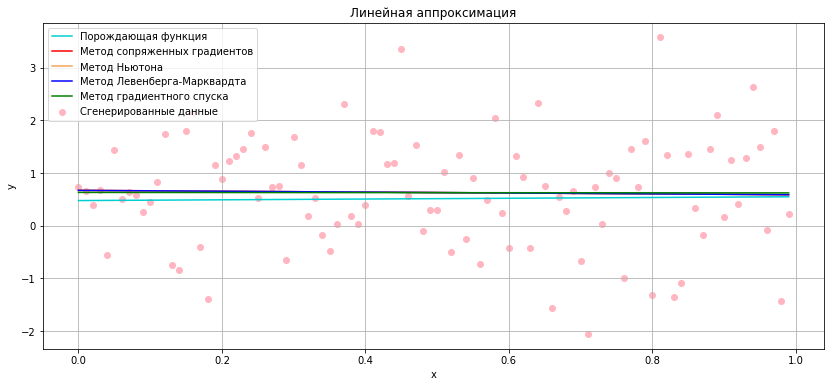

In [11]:
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

#Линейная аппроксимация с минимизацией методом градиентного спуска 
res = gradient_descent(sq_function_lin, params)
GD_lin_approx_array=[res[0]*x+res[1] for x in x_array]
print('\nМетод градиентного спуска:\na='+str(res[0])+', b='+str(res[1]))
print('Iteration: '+str(res[2]))
print('Calculations: '+str(res[3])+'\n')

#Линейная аппроксимация с минимизацией методом сопряженных градиентов
res = minimize(sq_function_lin, params,  method='CG', options={'disp': True})
CG_lin=res.x
CG_lin_approx_array=[CG_lin[0]*x+CG_lin[1] for x in x_array]
print('\nМетод сопряженных градиентов:\na='+str(CG_lin[0])+', b='+str(CG_lin[1]))

nw_lin = newton_optimization(sq_function_lin, params) 
nw_lin_approx_array=[nw_lin[0]*x+nw_lin[1] for x in x_array]
print('\nМетод Ньютона:\na='+str(nw_lin[0])+', b='+str(nw_lin[1]))
print('Iteration: '+str(nw_lin[2]))

#Переписываю аппроксимирующую функцию, потому что готовый метод не принимает ее в общем виде
def sq_function_lin_for_lm(params, x, y):
    a = params[0]
    b = params[1]
    return((a*np.array(x) + b) - np.array(y))

res=leastsq(sq_function_lin_for_lm, params, args=(x_array, y_array), full_output = True)
lm_lin=res[0]
lm_lin_approx_array=[lm_lin[0]*x+lm_lin[1] for x in x_array]
print('\nМетод Левенберга-Марквардта:\na='+str(lm_lin[0])+', b='+str(lm_lin[1]))
print('Calculations: '+str(res[2]['nfev'])+'\n')

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, CG_lin_approx_array, color='red', label='Метод сопряженных градиентов')
ax.plot(x_array, nw_lin_approx_array, color='SandyBrown', label='Метод Ньютона')
ax.plot(x_array, lm_lin_approx_array, color='blue', label='Метод Левенберга-Марквардта')
ax.plot(x_array, GD_lin_approx_array, color='green', label='Метод градиентного спуска')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Линейная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()

## Для сравнения с результатами из задания 2 на тех же данных


Исходные параметры:
a=0.0726075067641645, b=0.477273162230093
Optimization terminated successfully.
         Current function value: 108.735379
         Iterations: 68
         Function evaluations: 136

Метод Нелдера-Мида:
a=0.6722193315905115, b=0.13894055941145098

Метод перебора:
a=0.6722156991027298, b=0.13891179059259595
Optimization terminated successfully.
         Current function value: 108.735379
         Iterations: 3
         Function evaluations: 101

Метод Пауэлла:
a=0.672233778997646, b=0.13881804431157707


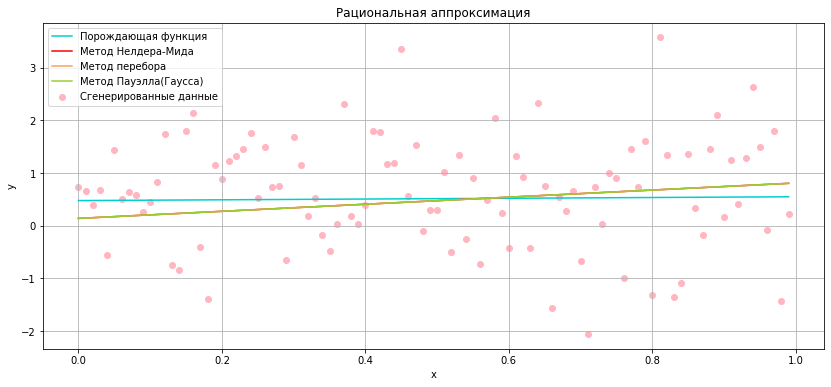

In [17]:
#Рациональная аппроксимация с минимизацией методом Нелдера-Мида 
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

params=[0.5, 0.5]
res = minimize(sq_function_rat, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_rat=res.x
nm_rat_approx_array=[nm_rat[0]*x+nm_rat[1] for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_rat[0])+', b='+str(nm_rat[1]))

#Рациональная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_rat=brute(sq_function_rat, rranges, finish=fmin)
bf_rat_approx_array=[bf_rat[0]*x+bf_rat[1] for x in x_array]
print('\nМетод перебора:\na='+str(bf_rat[0])+', b='+str(bf_rat[1]))

#Рациональная аппроксимация с минимизацией методом Пауэлла (вместо Гаусса) 
res = minimize(sq_function_rat, params,  method='powell',
    options={'xtol': 1e-8, 'disp': True})
pow_rat=res.x
pow_rat_approx_array=[pow_rat[0]*x+pow_rat[1] for x in x_array]
print('\nМетод Пауэлла:\na='+str(pow_rat[0])+', b='+str(pow_rat[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, nm_rat_approx_array, color='red', label='Метод Нелдера-Мида')
ax.plot(x_array, bf_rat_approx_array, color='SandyBrown', label='Метод перебора')
ax.plot(x_array, pow_rat_approx_array, color='#9ACD32', label='Метод Пауэлла(Гаусса)')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Рациональная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()


Исходные параметры:
a=0.0726075067641645, b=0.477273162230093
Optimization terminated successfully.
         Current function value: 108.735067
         Iterations: 67
         Function evaluations: 133

Метод Нелдера-Мида:
a=-0.08299947181789148, b=0.6709265684354393

Метод перебора:
a=-0.08304196628502211, b=0.6709461581654899
Optimization terminated successfully.
         Current function value: 108.735067
         Iterations: 4
         Function evaluations: 148

Метод Пауэлла:
a=-0.08299947510620999, b=0.6709265492407297


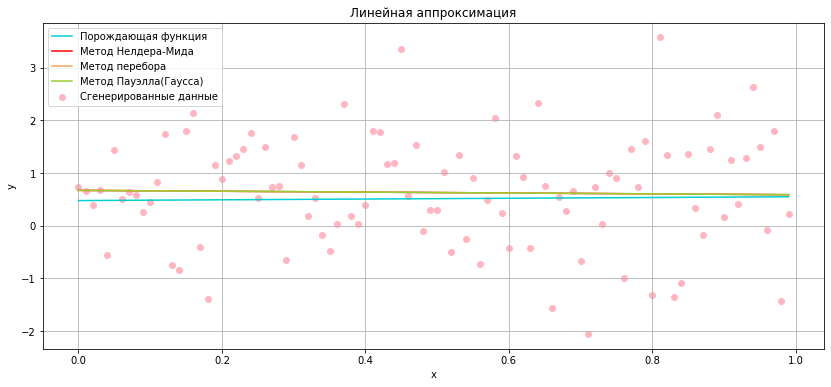

In [18]:
#Линейная аппроксимация с минимизацией методом Нелдера-Мида    
print('\nИсходные параметры:\na='+str(a)+', b='+str(b))

params=[0.5, 0.5]
res = minimize(sq_function_lin, params,  method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})
nm_lin=res.x
nm_lin_approx_array=[nm_lin[0]*x+nm_lin[1] for x in x_array]
print('\nМетод Нелдера-Мида:\na='+str(nm_lin[0])+', b='+str(nm_lin[1]))

#Линейная аппроксимация с минимизацией методом перебора 
rranges = (slice(0, 1, 0.01), slice(0, 1, 0.01))
bf_lin=brute(sq_function_lin, rranges, finish=fmin)
bf_lin_approx_array=[bf_lin[0]*x+bf_lin[1] for x in x_array]
print('\nМетод перебора:\na='+str(bf_lin[0])+', b='+str(bf_lin[1]))

#Линейная аппроксимация с минимизацией методом Пауэлла (вместо Гаусса) 
res = minimize(sq_function_lin, params,  method='powell',
    options={'xtol': 1e-8, 'disp': True})
pow_lin=res.x
pow_lin_approx_array=[pow_lin[0]*x+pow_lin[1] for x in x_array]
print('\nМетод Пауэлла:\na='+str(pow_lin[0])+', b='+str(pow_lin[1]))

plt.rcParams['figure.figsize'] = [14, 6]
fig, ax = plt.subplots()
ax.plot(x_array, [el*a+b for el in x_array], color='DarkTurquoise', label='Порождающая функция')
ax.plot(x_array, nm_lin_approx_array, color='red', label='Метод Нелдера-Мида')
ax.plot(x_array, bf_lin_approx_array, color='SandyBrown', label='Метод перебора')
ax.plot(x_array, pow_lin_approx_array, color='#9ACD32', label='Метод Пауэлла(Гаусса)')
ax.scatter(x_array, y_array, color='#FFB6C1', label='Сгенерированные данные')
ax.set(xlabel='x', ylabel='y',title='Линейная аппроксимация')
leg = plt.legend()
ax.grid()
plt.show()